In [16]:
from graph_tool.all import *
import numpy as np
from re import search, sub
from textwrap import fill

In [17]:
PATH = "split-0.dag" #input file
GRAPH_DATA = "graph.txt" #output file

In [18]:
def parse_file():
    with open(PATH, 'r') as f:
        with open(GRAPH_DATA, 'w') as f2:
            for line in f:
                if line.startswith(('PARENT', 'CHILD')):
                    f2.write(line)
                    
parse_file()

In [19]:
def remove_data(graph_set):
    graph_set.remove('PARENT')
    graph_set.remove('CHILD')
    return graph_set

def create_empty_matrix():
    graph_set = set()
    with open(GRAPH_DATA, 'r') as f:
        for line in f:
            data = line.split()
            graph_set.update(data)
    graph_set = remove_data(graph_set)
    sez_size = len(graph_set)
    return np.zeros((sez_size, sez_size)), graph_set

In [20]:
def unique_dict_entry(graph_set):
    return {v:k for k, v in enumerate(graph_set)}

def create_adjacency_matrix(adjacency_matrix, dict_data):
    with open(GRAPH_DATA, 'r') as f:
        for line in f:
            parent = search(r'(?<=\bPARENT\s)(\s+\w+)', line).group()
            child = search(r'(?<=\bCHILD)(\s+\w+)', line).group()
            parent_id = dict_data.get(parent.strip())
            child_id = dict_data.get(child.strip())
            matrix[parent_id][child_id] = 1
    return adjacency_matrix

In [21]:
matrix, data = create_empty_matrix()
data_d = unique_dict_entry(data)
a_matrix = create_adjacency_matrix(matrix, data_d)

In [22]:
print(a_matrix)

[[ 0.  0.  0.  1.  0.  0.  1.  0.  1.  1.  1.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
 [ 0.  1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]


In [23]:
g = Graph()

def shorten_label(label):
    components = label.replace('0', "").split('_')
    
    return components[0] + "".join(x.title() for x in components[1:])

def transform_dict(data_dict, graph):
    transformed_dict = {}
    for key, val in data_dict.items():
        transformed_dict[val] = {'name': shorten_label(key),
                                 'vertex': graph.add_vertex()}
    return transformed_dict

vertex_dict = transform_dict(data_d, g)

In [24]:
def fill_graph(data_dict, a_matrix, graph):
    size = a_matrix.shape[0]
    vprop = graph.new_vertex_property("string")
    graph.vp.name = vprop
    try:
        for i in range(size):
            act_ver = data_dict[i]['vertex']
            graph.vp.name[act_ver] = data_dict[i]['name']
            for j in range(size):
                if a_matrix[i][j] == 1:
                    g.add_edge(act_ver, data_dict[j]['vertex'])
    except KeyError as e:
        print(e)

fill_graph(vertex_dict, a_matrix, g)

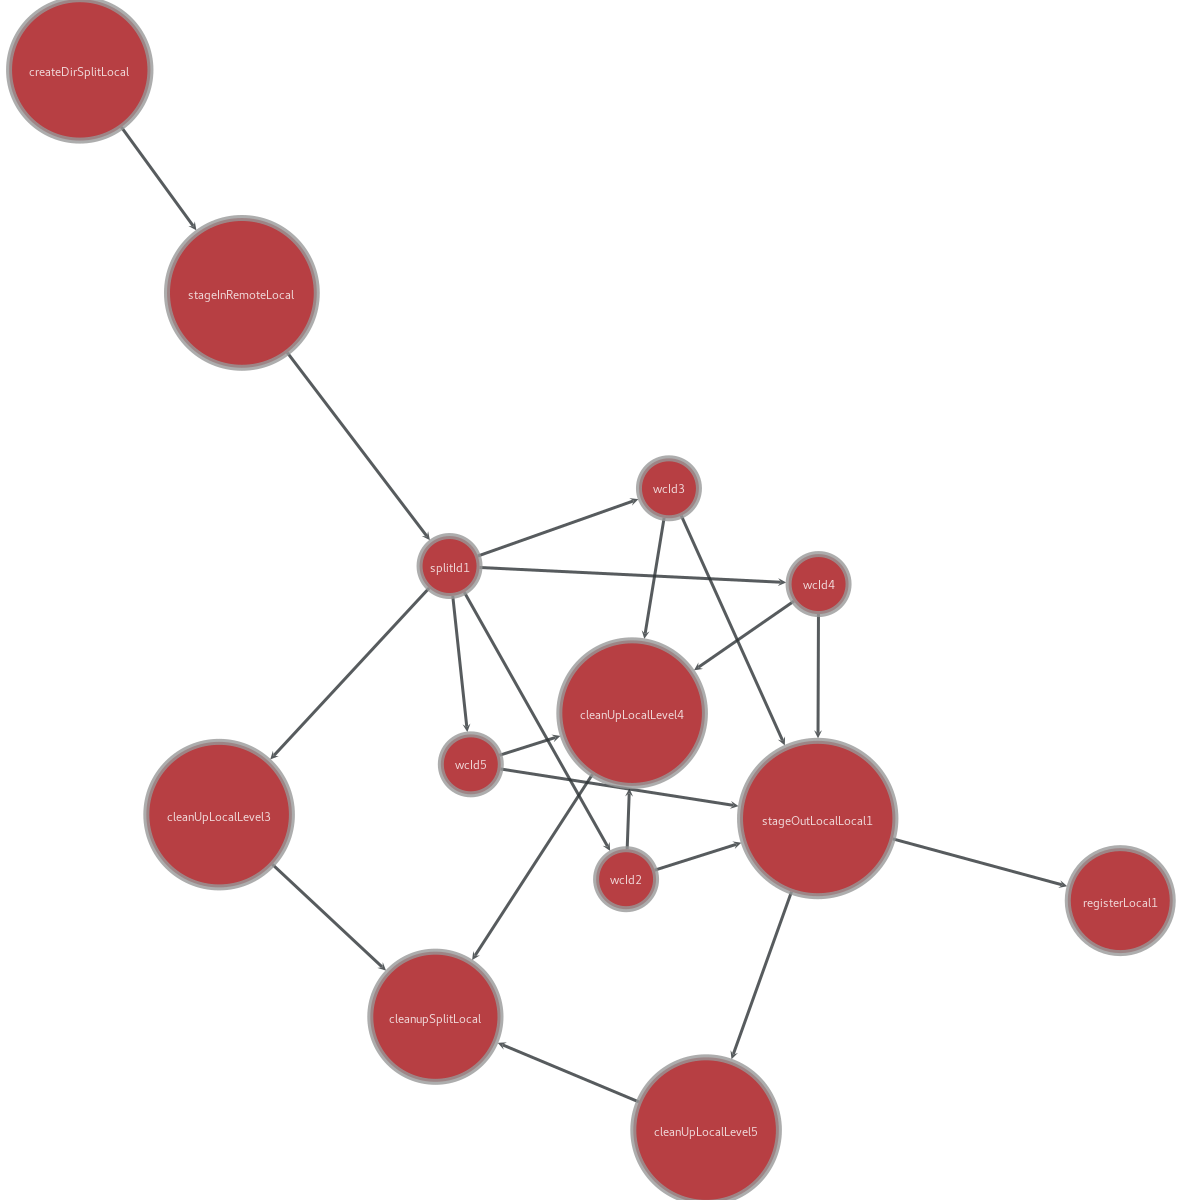

In [25]:
IMG_SIZE = (1200,1200)
VERTEX_SIZE = 60
EDGE_SIZE = 3
FONT_SIZE = 12
def draw_graph(graph):
    pos = sfdp_layout(graph)
    graph_draw(graph, 
               pos=pos,
               vertex_text=graph.vp.name,
#                vertex_text_position=2,
               vertex_font_size=FONT_SIZE,
               vertex_size=VERTEX_SIZE,
               edge_pen_width=EDGE_SIZE,
               output_size=IMG_SIZE,
               output="graph.png")
    
draw_graph(g)

In [15]:
#test

In [26]:
print(data)

{'split_ID0000001', 'stage_out_local_local_1_0', 'clean_up_local_level_4_0', 'wc_ID0000003', 'clean_up_local_level_5_0', 'create_dir_split_0_local', 'wc_ID0000002', 'cleanup_split_0_local', 'wc_ID0000004', 'clean_up_local_level_3_0', 'wc_ID0000005', 'register_local_1_0', 'stage_in_remote_local_0_0'}


In [105]:
def s_n(string):
    return sub(r'\d+|_+', '', string)
    
d_gr = [{'name': k, 'gr_name': s_n(k)} for k in data]

In [106]:
print(d_gr)

[{'name': 'split_ID0000001', 'gr_name': 'splitID'}, {'name': 'stage_out_local_local_1_0', 'gr_name': 'stageoutlocallocal'}, {'name': 'clean_up_local_level_4_0', 'gr_name': 'cleanuplocallevel'}, {'name': 'wc_ID0000003', 'gr_name': 'wcID'}, {'name': 'clean_up_local_level_5_0', 'gr_name': 'cleanuplocallevel'}, {'name': 'create_dir_split_0_local', 'gr_name': 'createdirsplitlocal'}, {'name': 'wc_ID0000002', 'gr_name': 'wcID'}, {'name': 'cleanup_split_0_local', 'gr_name': 'cleanupsplitlocal'}, {'name': 'wc_ID0000004', 'gr_name': 'wcID'}, {'name': 'clean_up_local_level_3_0', 'gr_name': 'cleanuplocallevel'}, {'name': 'wc_ID0000005', 'gr_name': 'wcID'}, {'name': 'register_local_1_0', 'gr_name': 'registerlocal'}, {'name': 'stage_in_remote_local_0_0', 'gr_name': 'stageinremotelocal'}]


In [107]:
import itertools
from operator import itemgetter

In [108]:
sorted_d_gr = sorted(d_gr, key=itemgetter('gr_name'))

In [120]:
groups = []
uniquekeys = []
for k, v in itertools.groupby(sorted_d_gr, key=lambda x: x['gr_name']):
    groups.append(list(v))
    uniquekeys.append(k)

In [116]:
print(uniquekeys)

['cleanuplocallevel', 'cleanupsplitlocal', 'createdirsplitlocal', 'registerlocal', 'splitID', 'stageinremotelocal', 'stageoutlocallocal', 'wcID']


In [117]:
print(groups)

[[{'name': 'clean_up_local_level_4_0', 'gr_name': 'cleanuplocallevel'}, {'name': 'clean_up_local_level_5_0', 'gr_name': 'cleanuplocallevel'}, {'name': 'clean_up_local_level_3_0', 'gr_name': 'cleanuplocallevel'}], [{'name': 'cleanup_split_0_local', 'gr_name': 'cleanupsplitlocal'}], [{'name': 'create_dir_split_0_local', 'gr_name': 'createdirsplitlocal'}], [{'name': 'register_local_1_0', 'gr_name': 'registerlocal'}], [{'name': 'split_ID0000001', 'gr_name': 'splitID'}], [{'name': 'stage_in_remote_local_0_0', 'gr_name': 'stageinremotelocal'}], [{'name': 'stage_out_local_local_1_0', 'gr_name': 'stageoutlocallocal'}], [{'name': 'wc_ID0000003', 'gr_name': 'wcID'}, {'name': 'wc_ID0000002', 'gr_name': 'wcID'}, {'name': 'wc_ID0000004', 'gr_name': 'wcID'}, {'name': 'wc_ID0000005', 'gr_name': 'wcID'}]]


In [122]:
grp_setl = []
for lst in groups:
    v = set()
    for i in lst:
        v.add(i['name'])
    grp_setl.append(v)

In [123]:
print(grp_setl)

[{'clean_up_local_level_4_0', 'clean_up_local_level_3_0', 'clean_up_local_level_5_0'}, {'cleanup_split_0_local'}, {'create_dir_split_0_local'}, {'register_local_1_0'}, {'split_ID0000001'}, {'stage_in_remote_local_0_0'}, {'stage_out_local_local_1_0'}, {'wc_ID0000003', 'wc_ID0000002', 'wc_ID0000005', 'wc_ID0000004'}]
